# Cross-Validation & Simple Linear Regression

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statistics 
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse

In [2]:
Salaries = pd.read_csv('salary.csv')
Salaries.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
Salaries.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [4]:
Salaries_df =  Salaries.fillna(Salaries['salary'].mean(),inplace = False)
Salaries_df.isnull().sum().sum()

0

- Instead dropping null values i decided to impute them with the mean as all data is usefull

In [5]:
Salaries_df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12672.762650,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50165.500000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60306.250000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


#### Salary 

- The min salary is 2900 and the max is 96156.00 

#### yearsworked

- The 

### Plotting a histogram

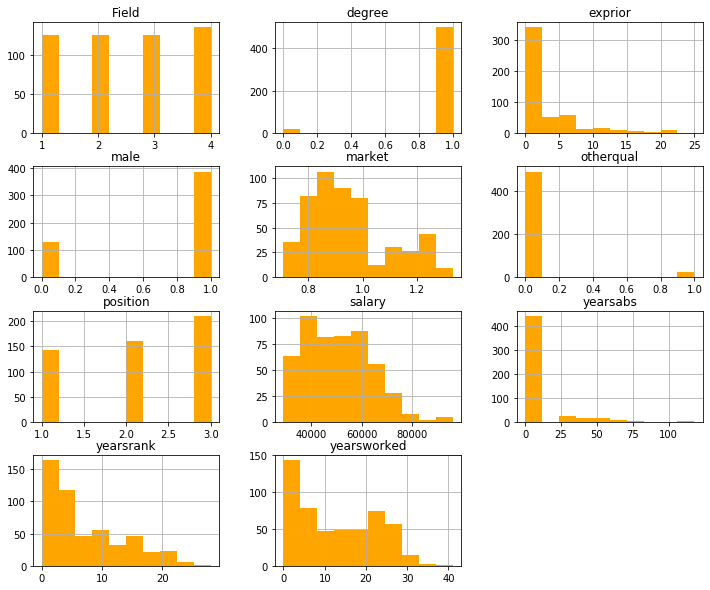

In [6]:
Salaries_df.hist(figsize =(12, 10), color = "orange");

##### Distrubutions
- Salary, otherqual,yearsworked and yearsrank graphs a re stewed to the right 

In [7]:
%matplotlib inline

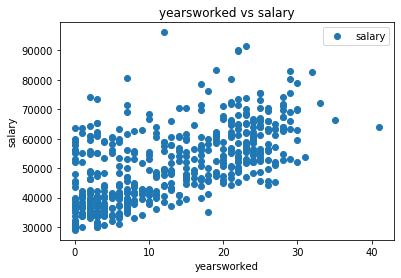

In [8]:
Salaries_df.plot(x='yearsworked', y='salary', style='o')  
plt.title('yearsworked vs salary')  
plt.xlabel('yearsworked')  
plt.ylabel('salary')  
plt.show()

- This show a positive linear relationship. The data is appropriate for linear regression.

####  Are the data appropriate for linear regression? Is there anything that needs to be transformed or edited first?


In [9]:
pearsonr(Salaries_df['yearsworked'],Salaries_df['salary'])


(0.6231354820920547, 1.274779518969558e-56)

- There's is no need to transform our dataset

### Using the stasmodels package and the training data, run a simple linear regression for Salary with one predictor variable: Years Worked.


In [10]:
X = Salaries_df[['yearsworked']]
y = Salaries_df['salary']
x = sm.add_constant(X)


In [11]:
# - Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [12]:
model = sm.OLS(y_train,x_train).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     207.2
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           2.27e-37
Time:                        06:37:09   Log-Likelihood:                -3825.5
No. Observations:                 359   AIC:                             7655.
Df Residuals:                     357   BIC:                             7663.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.058e+04    910.788     44.553      0.000    3.88e+04    4.24e+04
yearsworked   827.1461     57.457     14.396      0.000     714.150     940.143
==============================================================================
Omnibus:                       59.682   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.799
Skew:                           1.064   Prob(JB):                     8.61e-20
Kurtosis:                       4.158   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model.pvalues

const          6.960403e-148
yearsworked     2.266004e-37
dtype: float64

#### Does the model significantly predict the dependent variable? Report the amount of variance explained (R^2) and significance value (p) to support your answer.

- The model does not significantly predict the dependant variable as the R^2 value is 0.371, which is really low  which means that this model does not provide a better fit to the train set data. 

#### What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

In [15]:
model.rsquared

0.3672941891040684

The percentage is 36.729% of employees’ salaries is accounted for by the number of years they have worked



In [16]:
model.pvalues

const          6.960403e-148
yearsworked     2.266004e-37
dtype: float64

#### What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?

In [17]:
model.params

const          40578.147426
yearsworked      827.146115
dtype: float64

For every year worked, people get a salary increase of 813.24 a year.

#### What do the 95% confidence intervals [0.025, 0.975] mean?

Having a 95% confidence intervals means we are confident that the true value of the population is between the intervals

#### Calculate the expected salary for someone with 12 years’ work experience.

In [18]:
model.predict(pd.DataFrame({'conts':1.0,'yars':[12]}))


0    50503.900803
dtype: float64

A person with 12 years work experience will most likely be earning a salary of R 50 597.942

#### Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

In [19]:
model.predict(pd.DataFrame({'conts':1.0,'years':[80]}))


0    106749.836606
dtype: float64

A person with 80 years work experience will most likely be earning a salary of R106 559.618

The maximum years on our dataset is 41 years and their max salary is 96156.00. There isn't much of a problem but why would some have to worked 39 years more for an increase of  R10 443.618 this means that there's either we need to add another predictor variabke to be sure because the increase is too slow for such along time.

#### We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

In [20]:
Salaries_df.corr().head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119946,0.623135,0.610580,0.407208,0.044552,0.167129,0.701354,0.361447,-0.498485,-0.069622
exprior,0.119946,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.116596,0.046558,-0.048315,0.132380
yearsworked,0.623135,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,-0.261379,0.055468
yearsrank,0.610580,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,-0.263953,0.035632
market,0.407208,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.013358,0.181201,-0.223827,-0.167068


Another characteristic that can influence someones salary is the years worked. As it has a positive and high correlation with salary.

##### Now fit your model to your test set. DO NOT BUILD A NEW MODEL ON THE TEST SET! Simply use your existing, model, to predict salaries in the test set.

In [21]:
rmse_train=rmse(y_train, model.predict(x_train))
print('The rmse  for the train set is :' ,rmse_train)

The rmse  for the train set is : 10271.059383932117


In [22]:
rmse_test=rmse(y_test, model.predict(x_test))
print('The rmse  for the test set is :',rmse_test)

The rmse  for the test set is : 9012.148714524601


In [23]:
print('the difference in RMSE between training and testing is:', rmse_train - rmse_test)

the difference in RMSE between training and testing is: 1258.9106694075163


- The RMSE of the training dataset is more than testing that of training dataset.
- This means that the model is not fitted for testing dataset
- The model predicts too well which could suggest that there is overfitting.

In [24]:
predictions = model.predict(x_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df1

,Actual,Predicted
283,62091.00000,59602.508065
100,42482.00000,48022.462459
37,46292.00000,42232.439656
46,59110.00000,43886.731885
375,89789.00000,58775.361951
...,...,...
326,53686.00000,66219.676983
249,69374.00000,62083.946410
254,70101.78125,59602.508065
5,56000.00000,40578.147426


### Conclusion

- Yearsworked alone cannot be a good predictor for salary we have to take in consideration other factors like market and yearsrank in order to try to get more precise predictions